In [51]:
#导入筛选和清洁后的数据
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
from matplotlib import pyplot as plt
data = pd.read_csv("C:\\Users\\李乔乔\\Desktop\\华数杯数学建模\\data_xuni.csv",engine='python')

data1=data[data["i"]==1]
data1
data2=data[data["i"]==2]
data2
data3=data[data["i"]==3]
data3
columns_size = data3.columns.size
data3.iloc[:,2:columns_size-1]

,a1,a2,a3,a4,a5,a6,a7,a8,B2,B4,...,b12_1,b12_2,b12_3,b12_4,b12_5,b12_6,b12_7,b12_8,b12_9,b12_10
1,88.92,90.18,88.92,88.88,88.87,88.88,90.98,88.87,20,3,...,0,0,0,1,0,0,0,0,0,0
2,67.26,67.10,66.69,70.34,69.73,69.74,73.52,66.66,32,8,...,0,1,0,0,0,0,0,0,0,0
3,93.53,90.94,73.90,88.88,90.65,94.17,95.60,96.65,34,5,...,0,0,0,0,0,0,1,0,0,0
4,89.65,93.95,73.90,96.30,88.87,96.92,95.60,95.88,36,5,...,0,1,0,0,0,0,0,0,0,0
5,75.53,81.09,62.94,77.77,66.65,74.70,77.77,77.76,15,6,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,83.52,75.93,74.05,85.61,63.64,88.68,84.31,77.34,27,3,...,0,0,0,0,0,0,0,1,0,0
1693,89.65,78.56,74.05,89.30,70.21,89.21,84.31,81.02,32,12,...,0,1,0,0,0,0,0,0,0,0
1694,79.84,71.79,77.81,78.66,77.60,74.70,77.77,74.44,8,3,...,0,0,0,0,0,0,1,0,0,0
1695,72.28,63.69,74.05,74.03,63.58,66.99,68.95,59.23,10,3,...,0,0,0,0,0,0,1,0,0,0


In [52]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 20%用于测试集，80%用于训练集
train,test= train_test_split(data1,test_size=0.20,random_state=10)
def get_y_train():
    y_train = np.array(train['willing'])
   
    return y_train
 
def get_y_test():
    y_test = np.array(test['willing'])
 
    return y_test
 
def get_X_train():
   # oh_data = pd.get_dummies(train) #对非数值数据进行ont-hot编码
   #y_train = np.where(y_train == '1', 1, 0) #将预测值转换成01
    columns_size = train.columns.size
    X_train = train.iloc[:,2:columns_size-1] #取特征
    X_train = preprocessing.scale(X_train) #归一化
    return X_train
 
def get_X_test():
    #oh_test = pd.get_dummies(test) #对非数值数据进行ont-hot编码
    # y_train = np.where(y_test == '1', 1, 0) #将预测值转换成01
    columns_size = test.columns.size
    X_test = test.iloc[:,2:columns_size-1] #取特征
    X_test= preprocessing.scale(X_test) #归一化
    return X_test
X_test = get_X_test()
X_train = get_X_train()
y_test = get_y_test()
y_train = get_y_train()


>>>特征权重值
 [0.04871234 0.         0.11213666 0.         0.09445517 0.05810718
 0.12535387 0.08155393 0.07339854 0.         0.         0.
 0.         0.05024544 0.03139738 0.06053064 0.00957641 0.
 0.05473481 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04757313 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.08232113 0.         0.         0.         0.         0.
 0.         0.         0.05257316 0.         0.         0.01733021
 0.        ]

>>>索引降序排列
 [ 6  2  4 42  7  8 15  5 18 50 13  0 31 14 53 16 21 20 19 22 11 17 12 24
 10  9  3  1 23 54 25 40 52 51 49 48 47 46 45 44 43 41 39 26 38 37 36 35
 34 33 32 30 29 28 27]

>>>特征名
 ['a7', 'a3', 'a5', 'b11_6', 'a8', 'B2', 'B14', 'a6', 'B17', 'b12_6', 'B10', 'a1', 'b6_6', 'B13', 'b12_9', 'B15', 'b3_1', 'b1_2', 'b1_1', 'b3_2', 'B7', 'B16', 'B8', 'b3_4', 'B5', 'B4', 'a4', 'a2', 'b3_3', 'b12_10', 'b3_5', 'b11_4', 'b12_8', 

Text(0.5, 1.0, 'Feature Weights')

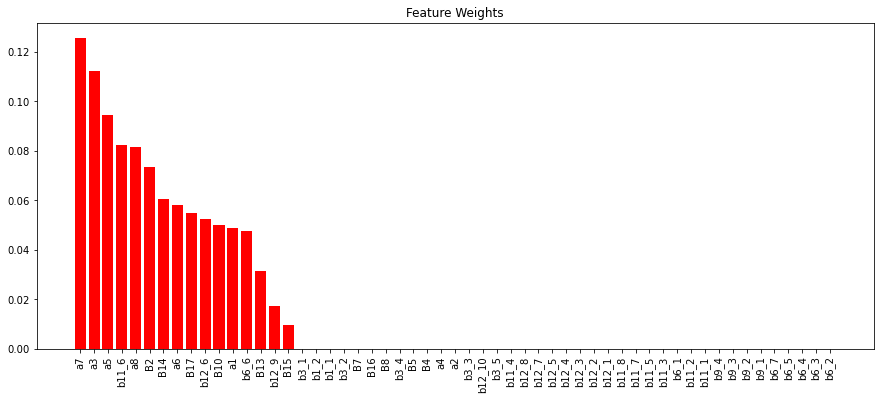

In [53]:
#无论是分类还是回归问题都可以使用决策树算法来获取特征重要性权重值。
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()  # 初始化
dtc.fit(X_train, y_train)  # 训练

# 获取特征权重值
weights = dtc.feature_importances_
print('>>>特征权重值\n', weights)

# 索引降序排列
sort_index = np.argsort(weights)[::-1] 
# 对应的特征名
name = [train.iloc[:, 2:].columns[i] for i in sort_index]
print('\n>>>索引降序排列\n', sort_index)
print('\n>>>特征名\n', name)

# 可视化
plt.figure(figsize=(15,6),facecolor='white',edgecolor='white') #设置画布颜色、画布边线颜色
plt.bar(x=name, height=weights[sort_index], color='r')
_ = plt.xticks(rotation=90)
plt.title('Feature Weights')
#下图可以看出每个特征都有作用，都不可舍去

In [54]:
a=pd.DataFrame(weights)

b=pd.DataFrame(train.iloc[:, 2:57].columns)
#b
b["weights"]=a
b


,0,weights
0,a1,0.048712
1,a2,0.000000
2,a3,0.112137
3,a4,0.000000
4,a5,0.094455
5,a6,0.058107
6,a7,0.125354
7,a8,0.081554
8,B2,0.073399
9,B4,0.000000


In [55]:
b.to_csv("pinpai1_weight.csv")

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 20%用于测试集，80%用于训练集
train,test= train_test_split(data2,test_size=0.20,random_state=10)
def get_y_train():
    y_train = np.array(train['willing'])
   
    return y_train
 
def get_y_test():
    y_test = np.array(test['willing'])
 
    return y_test
 
def get_X_train():
   # oh_data = pd.get_dummies(train) #对非数值数据进行ont-hot编码
   #y_train = np.where(y_train == '1', 1, 0) #将预测值转换成01
    columns_size = train.columns.size
    X_train = train.iloc[:,2:columns_size-1] #取特征
    X_train = preprocessing.scale(X_train) #归一化
    return X_train
 
def get_X_test():
    #oh_test = pd.get_dummies(test) #对非数值数据进行ont-hot编码
    # y_train = np.where(y_test == '1', 1, 0) #将预测值转换成01
    columns_size = test.columns.size
    X_test = test.iloc[:,2:columns_size-1] #取特征
    X_test= preprocessing.scale(X_test) #归一化
    return X_test
X_test = get_X_test()
X_train = get_X_train()
y_test = get_y_test()
y_train = get_y_train()


>>>特征权重值
 [0.0350551  0.0554872  0.02156889 0.00909019 0.03298691 0.02719426
 0.09536023 0.01752755 0.04365023 0.         0.0008002  0.00517642
 0.09174019 0.06611451 0.10513287 0.03295179 0.05126232 0.09729153
 0.02500589 0.         0.         0.02096356 0.         0.
 0.         0.         0.02047956 0.         0.         0.
 0.         0.02991368 0.         0.02964359 0.         0.
 0.         0.         0.         0.         0.         0.
 0.02822712 0.         0.         0.         0.03365289 0.01771389
 0.         0.         0.         0.         0.         0.
 0.00600945]

>>>索引降序排列
 [14 17  6 12 13  1 16  8  0 46  4 15 31 33 42  5 18  2 21 26 47  7  3 54
 11 10 30 39 52 51 50 49 48 45 44 43  9 41 40 38 29 37 36 35 19 20 34 22
 23 24 25 32 53 28 27]

>>>特征名
 ['B13', 'B16', 'a7', 'B8', 'B10', 'a2', 'B15', 'B2', 'a1', 'b12_2', 'a5', 'B14', 'b6_6', 'b9_1', 'b11_6', 'a6', 'B17', 'a3', 'b3_1', 'b6_1', 'b12_3', 'a8', 'a4', 'b12_10', 'B7', 'B5', 'b6_5', 'b11_3', 'b12_8', 'b12_7', 'b12_

Text(0.5, 1.0, 'Feature Weights')

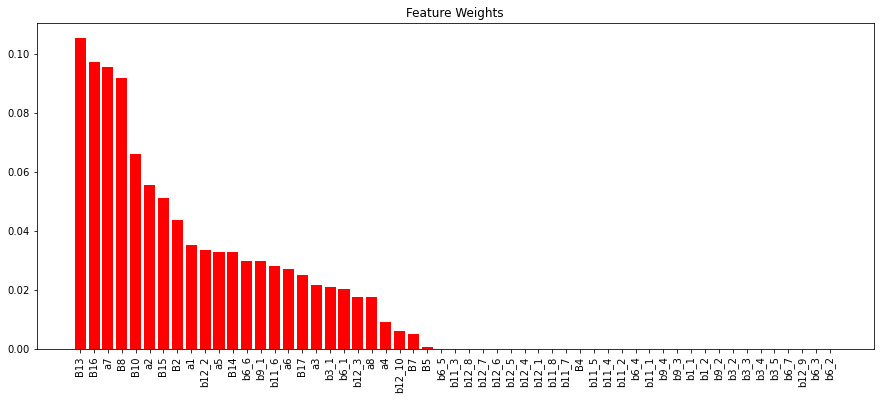

In [57]:
#无论是分类还是回归问题都可以使用决策树算法来获取特征重要性权重值。
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()  # 初始化
dtc.fit(X_train, y_train)  # 训练

# 获取特征权重值
weights = dtc.feature_importances_
print('>>>特征权重值\n', weights)

# 索引降序排列
sort_index = np.argsort(weights)[::-1] 
# 对应的特征名
name = [train.iloc[:, 2:].columns[i] for i in sort_index]
print('\n>>>索引降序排列\n', sort_index)
print('\n>>>特征名\n', name)

# 可视化
plt.figure(figsize=(15,6),facecolor='white',edgecolor='white') #设置画布颜色、画布边线颜色
plt.bar(x=name, height=weights[sort_index], color='r')
_ = plt.xticks(rotation=90)
plt.title('Feature Weights')
#下图可以看出每个特征都有作用，都不可舍去

In [58]:
a=pd.DataFrame(weights)

b=pd.DataFrame(train.iloc[:, 2:57].columns)
#b
b["weights"]=a
b.to_csv("pinpai2_weight.csv")


In [59]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 20%用于测试集，80%用于训练集
train,test= train_test_split(data3,test_size=0.20,random_state=10)
def get_y_train():
    y_train = np.array(train['willing'])
   
    return y_train
 
def get_y_test():
    y_test = np.array(test['willing'])
 
    return y_test
 
def get_X_train():
   # oh_data = pd.get_dummies(train) #对非数值数据进行ont-hot编码
   #y_train = np.where(y_train == '1', 1, 0) #将预测值转换成01
    columns_size = train.columns.size
    X_train = train.iloc[:,2:columns_size-1] #取特征
    X_train = preprocessing.scale(X_train) #归一化
    return X_train
 
def get_X_test():
    #oh_test = pd.get_dummies(test) #对非数值数据进行ont-hot编码
    # y_train = np.where(y_test == '1', 1, 0) #将预测值转换成01
    columns_size = test.columns.size
    X_test = test.iloc[:,2:columns_size-1] #取特征
    X_test= preprocessing.scale(X_test) #归一化
    return X_test
X_test = get_X_test()
X_train = get_X_train()
y_test = get_y_test()
y_train = get_y_train()


>>>特征权重值
 [0.         0.10280374 0.18397326 0.         0.         0.
 0.         0.         0.         0.18181818 0.         0.
 0.10058229 0.041808   0.         0.09671374 0.         0.
 0.05741627 0.         0.         0.06060606 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.055311
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.09090909 0.02805836
 0.        ]

>>>索引降序排列
 [ 2  9  1 12 15 52 21 18 35 13 53 22 23 20 19 17 16 54 14 25 11 10  8  7
  6  5  4  3 24 27 26 41 51 50 49 48 47 46 45 44 43 42 40 28 39 38 37 36
 34 33 32 31 30 29  0]

>>>特征名
 ['a3', 'B4', 'a2', 'B8', 'B14', 'b12_8', 'b3_1', 'B17', 'b9_3', 'B10', 'b12_9', 'b3_2', 'b3_3', 'b1_2', 'b1_1', 'B16', 'B15', 'b12_10', 'B13', 'b3_5', 'B7', 'B5', 'B2', 'a8', 'a7', 'a6', 'a5', 'a4', 'b3_4', 'b6_2', 'b6_1', 'b11_5', 'b12_7', '

Text(0.5, 1.0, 'Feature Weights')

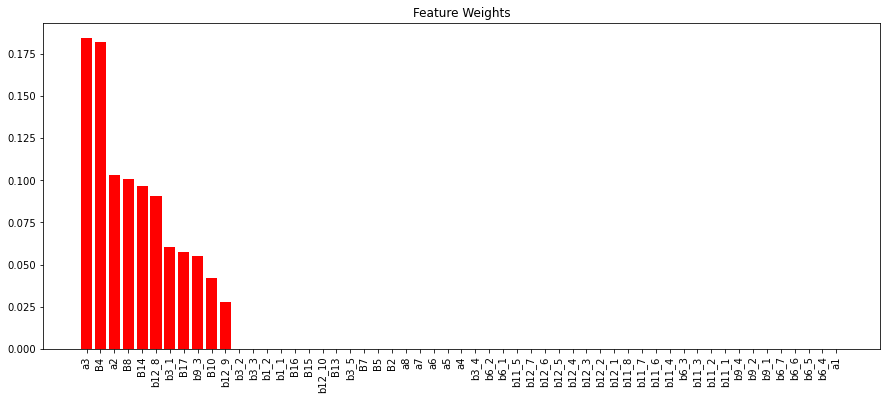

In [60]:
#无论是分类还是回归问题都可以使用决策树算法来获取特征重要性权重值。
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()  # 初始化
dtc.fit(X_train, y_train)  # 训练

# 获取特征权重值
weights = dtc.feature_importances_
print('>>>特征权重值\n', weights)

# 索引降序排列
sort_index = np.argsort(weights)[::-1] 
# 对应的特征名
name = [train.iloc[:, 2:].columns[i] for i in sort_index]
print('\n>>>索引降序排列\n', sort_index)
print('\n>>>特征名\n', name)

# 可视化
plt.figure(figsize=(15,6),facecolor='white',edgecolor='white') #设置画布颜色、画布边线颜色
plt.bar(x=name, height=weights[sort_index], color='r')
_ = plt.xticks(rotation=90)
plt.title('Feature Weights')
#下图可以看出每个特征都有作用，都不可舍去

In [61]:
a=pd.DataFrame(weights)

b=pd.DataFrame(train.iloc[:, 2:57].columns)
#b
b["weights"]=a
b.to_csv("pinpai3_weight.csv")